In [60]:
import pandas as pd
import numpy as np

In [21]:
#utf-8 was the solution to display the csv as a dataframe, as well as specifying the delimiter

df = pd.read_csv("/Users/etiennecampredon/Downloads/consommation-mondiale-de-gaz-naturel.csv", encoding="utf-8", delimiter = ";")

In [22]:
df

,annee,pays,consommation_gm3_an,country
0,2008,Amérique du Nord,778.2,North America
1,2014,Amérique du Nord,910.7,North America
2,2015,Amérique du Nord,934.1,North America
3,2020,Amérique du Nord,1030.9,North America
4,2008,Amérique centrale et du Sud,138.1,Central and South America
...,...,...,...,...
121,2009,Monde,2937.8,World
122,2020,Monde,3822.8,World
123,2021,Europe,571.1,Europe
124,2021,Moyen-Orient,575.4,Middle East


In [23]:
print(df.to_string())

     annee                         pays  consommation_gm3_an                    country
0     2008             Amérique du Nord                778.2              North America
1     2014             Amérique du Nord                910.7              North America
2     2015             Amérique du Nord                934.1              North America
3     2020             Amérique du Nord               1030.9              North America
4     2008  Amérique centrale et du Sud                138.1  Central and South America
5     2013  Amérique centrale et du Sud                163.5  Central and South America
6     2017  Amérique centrale et du Sud                172.6  Central and South America
7     2008                      Eurasie                521.3                    Eurasia
8     2008                       Europe                625.6                     Europe
9     2011                       Europe                580.1                     Europe
10    2018                      

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annee                126 non-null    int64  
 1   pays                 126 non-null    object 
 2   consommation_gm3_an  126 non-null    float64
 3   country              126 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ KB


In [25]:
import matplotlib.pyplot as plt

<AxesSubplot: >

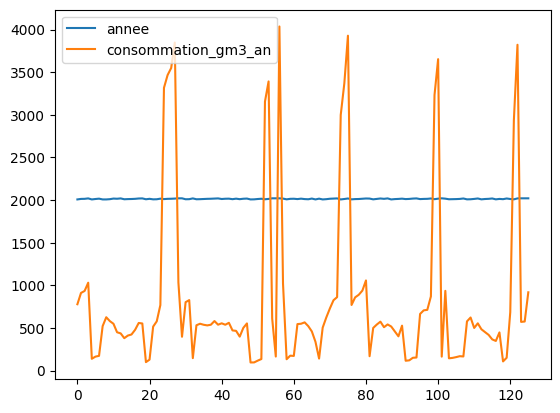

In [26]:
df.plot()

In [27]:
plt.show()

In [31]:
df.head()

,annee,pays,consommation_gm3_an,country
0,2008,Amérique du Nord,778.2,North America
1,2014,Amérique du Nord,910.7,North America
2,2015,Amérique du Nord,934.1,North America
3,2020,Amérique du Nord,1030.9,North America
4,2008,Amérique centrale et du Sud,138.1,Central and South America


In [34]:
# sorting "by a specific parameter", here the année (year)

df.sort_values(by=['annee'])

,annee,pays,consommation_gm3_an,country
0,2008,Amérique du Nord,778.2,North America
48,2008,Afrique,94.8,Africa
66,2008,Moyen-Orient,337.1,Middle East
73,2008,Monde,2998.8,World
8,2008,Europe,625.6,Europe
...,...,...,...,...
56,2021,Monde,4037.4,World
124,2021,Moyen-Orient,575.4,Middle East
123,2021,Europe,571.1,Europe
28,2021,Amérique du Nord,1034.1,North America


In [37]:
#ac for consumption, grouped by countries

ac = df.groupby('country')

In [38]:
ac.first()

,annee,pays,consommation_gm3_an
country,,,
Africa,2010,Afrique,98.9
Asia Pacific,2009,Asie Pacifique,515.6
Central and South America,2008,Amérique centrale et du Sud,138.1
Eurasia,2008,Eurasie,521.3
Europe,2008,Europe,625.6
Middle East,2010,Moyen-Orient,380.1
North America,2008,Amérique du Nord,778.2
UE27,2021,UE27,396.6
UE28,2016,UE28,449.3


In [91]:
# delete a column 
ac2 = df.drop(columns='pays')
ac2

# delete a row that contains a specific value from a column : https://www.statology.org/pandas-drop-rows-with-value/
ac2 = ac2[ac2.country != 'World']
ac2

,annee,consommation_gm3_an,country
0,2008,778.2,North America
1,2014,910.7,North America
2,2015,934.1,North America
3,2020,1030.9,North America
4,2008,138.1,Central and South America
...,...,...,...
119,2019,150.1,Africa
120,2013,685.5,Asia Pacific
123,2021,571.1,Europe
124,2021,575.4,Middle East


In [92]:
ac3 = ac2.groupby('annee')
ac3.first()

,consommation_gm3_an,country
annee,,
2008,778.2,North America
2009,515.6,Asia Pacific
2010,380.1,Middle East
2011,580.1,Europe
2012,410.8,Middle East
2013,163.5,Central and South America
2014,910.7,North America
2015,934.1,North America
2016,449.3,UE28


In [134]:
#calculate average of a group

ac5 = ac3.aggregate(np.mean)

/var/folders/8_/x8bm28353_sbfrc9d64z095m0000gn/T/ipykernel_22516/1998130462.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ac5 = ac3.aggregate(np.mean)


In [102]:
ac4 = ac2.groupby('country')
ac4.first()

,annee,consommation_gm3_an
country,,
Africa,2010,98.9
Asia Pacific,2009,515.6
Central and South America,2008,138.1
Eurasia,2008,521.3
Europe,2008,625.6
Middle East,2010,380.1
North America,2008,778.2
UE27,2021,396.6
UE28,2016,449.3


In [147]:
ac6 = ac4.aggregate(np.mean)

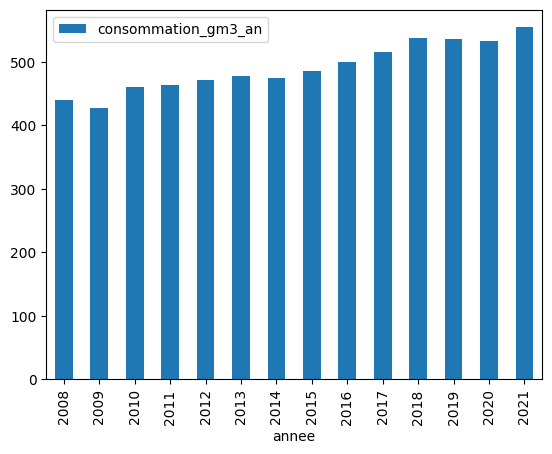

In [146]:
ac5.plot(kind = 'bar')
plt.show()